# Planar data classification with Deep Neural Network - Tensorflow

## 1. Import

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from lib_logistic import load_dataset, load_extra_datasets

# TensorFlow and tf.keras
from tensorflow import keras
from tensorflow.keras import layers

## 2. Load dataset

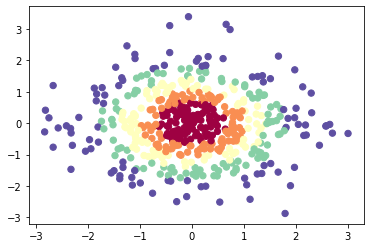

In [2]:
m = 500
n_y = 5
X, Y = load_dataset(m, n_y)
X, Y = X.T, Y.reshape(1, Y.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

In [3]:
Y

array([[1, 1, 3, 1, 3, 0, 1, 1, 3, 3, 4, 3, 4, 3, 2, 1, 4, 4, 0, 3, 4, 0,
        0, 1, 3, 4, 4, 1, 4, 0, 2, 4, 3, 0, 3, 1, 2, 2, 3, 4, 1, 1, 1, 2,
        2, 1, 0, 0, 3, 2, 3, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 4, 2, 2, 1,
        2, 1, 0, 0, 0, 2, 4, 3, 4, 3, 3, 1, 1, 4, 4, 3, 0, 1, 2, 3, 0, 0,
        1, 2, 3, 3, 2, 0, 4, 1, 4, 3, 3, 3, 0, 1, 4, 3, 1, 4, 1, 2, 2, 1,
        3, 0, 4, 1, 4, 4, 3, 1, 2, 3, 1, 2, 0, 3, 2, 2, 2, 4, 3, 3, 2, 1,
        3, 1, 0, 3, 3, 0, 4, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 3, 0, 0, 4,
        2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 4, 0, 4, 1, 4, 4, 1, 4, 1, 4, 3, 1,
        0, 4, 3, 4, 1, 3, 0, 3, 0, 1, 1, 1, 3, 1, 3, 3, 3, 4, 0, 2, 2, 0,
        4, 2, 4, 3, 3, 3, 1, 2, 4, 0, 3, 0, 0, 2, 1, 4, 0, 1, 2, 4, 4, 2,
        1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 4, 0, 2, 3, 2, 2, 3, 1, 2, 2,
        3, 4, 4, 2, 0, 0, 4, 2, 4, 4, 1, 3, 0, 4, 4, 1, 3, 1, 4, 2, 3, 0,
        2, 2, 3, 0, 2, 3, 0, 0, 4, 4, 1, 4, 3, 2, 0, 2, 2, 4, 4, 4, 0, 2,
        1, 2, 2, 1, 2, 4, 4, 0, 0, 4, 

## 3. One Hot Encoding

In [4]:
def toOneHot (C, labels):
    new_labels = []
    for lable in labels[0]:
        y = np.zeros(C)
        y[lable] = 1
        new_labels.append(y)
    return np.array(new_labels).T

In [5]:
Y_train = toOneHot(n_y, Y)
X_train = X
X_train.shape, Y_train.shape

((2, 500), (5, 500))

In [6]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [7]:
n_x, m = X_train.shape
n_y, m = Y_train.shape
n_x, n_y , m

(2, 5, 500)

## 4. Build model

In [10]:
#Layers
input_layer = keras.Input(shape=(n_x,), name='digits')
h_layer_1 = layers.Dense(128, activation='relu', name='dense_1')(input_layer)
h_layer_2 = layers.Dense(64, activation='relu', name='dense_2')(h_layer_1)
h_layer_3 = layers.Dense(32, activation='relu', name='dense_3')(h_layer_2)
h_layer_4 = layers.Dense(16, activation='relu', name='dense_4')(h_layer_3)
h_layer_5 = layers.Dense(8, activation='relu', name='dense_5')(h_layer_4)
output_layer = layers.Dense(n_y, activation='softmax', name='predictions')(h_layer_5)

In [11]:
#Model of NN
model = keras.Model(inputs=input_layer, outputs=output_layer)

In [12]:
#Gradient descent optimizer
rms = keras.optimizers.RMSprop(lr=0.01, rho=0.9, epsilon= 0.0001 , decay=0.0)

#Loss function
loss_softmax = keras.losses.CategoricalCrossentropy()

model.compile(optimizer= rms,  # Optimizer
              # Loss function to minimize
              loss= loss_softmax,
              # List of metrics to monitor
              metrics=[keras.metrics.CategoricalAccuracy()])

## 5. Train

In [16]:
print('# Fit model on training data')
history = model.fit(X_train.T, Y_train.T, #(m,)
                    batch_size=32,
                    epochs=500,
                   )

# Fit model on training data
Train on 500 samples
Epoch 1/500
500/500 [==============================] - 0s 95us/sample - loss: 0.0629 - categorical_accuracy: 0.9800
Epoch 2/500
500/500 [==============================] - 0s 92us/sample - loss: 0.0524 - categorical_accuracy: 0.9740
Epoch 3/500
500/500 [==============================] - 0s 66us/sample - loss: 0.0672 - categorical_accuracy: 0.9800
Epoch 4/500
500/500 [==============================] - 0s 69us/sample - loss: 0.0794 - categorical_accuracy: 0.9680
Epoch 5/500
500/500 [==============================] - 0s 78us/sample - loss: 0.4855 - categorical_accuracy: 0.9340
Epoch 6/500
500/500 [==============================] - 0s 72us/sample - loss: 0.0704 - categorical_accuracy: 0.9740
Epoch 7/500
500/500 [==============================] - 0s 76us/sample - loss: 0.0941 - categorical_accuracy: 0.9600
Epoch 8/500
500/500 [==============================] - 0s 65us/sample - loss: 0.0666 - categorical_accuracy: 0.9740
Epoch 9/500
500/500 [=

500/500 [==============================] - 0s 76us/sample - loss: 0.0746 - categorical_accuracy: 0.9780
Epoch 71/500
500/500 [==============================] - 0s 68us/sample - loss: 0.0978 - categorical_accuracy: 0.9620
Epoch 72/500
500/500 [==============================] - 0s 83us/sample - loss: 0.0484 - categorical_accuracy: 0.9740
Epoch 73/500
500/500 [==============================] - 0s 92us/sample - loss: 0.1629 - categorical_accuracy: 0.9640
Epoch 74/500
500/500 [==============================] - 0s 96us/sample - loss: 0.1232 - categorical_accuracy: 0.9660
Epoch 75/500
500/500 [==============================] - 0s 84us/sample - loss: 0.0984 - categorical_accuracy: 0.9640
Epoch 76/500
500/500 [==============================] - 0s 90us/sample - loss: 0.0489 - categorical_accuracy: 0.9800
Epoch 77/500
500/500 [==============================] - 0s 88us/sample - loss: 0.0899 - categorical_accuracy: 0.9700
Epoch 78/500
500/500 [==============================] - 0s 90us/sample - loss

500/500 [==============================] - 0s 83us/sample - loss: 0.0495 - categorical_accuracy: 0.9760
Epoch 139/500
500/500 [==============================] - 0s 77us/sample - loss: 0.1205 - categorical_accuracy: 0.9680
Epoch 140/500
500/500 [==============================] - 0s 116us/sample - loss: 0.0459 - categorical_accuracy: 0.9840
Epoch 141/500
500/500 [==============================] - 0s 92us/sample - loss: 0.0731 - categorical_accuracy: 0.9780
Epoch 142/500
500/500 [==============================] - 0s 93us/sample - loss: 0.1374 - categorical_accuracy: 0.9660
Epoch 143/500
500/500 [==============================] - 0s 65us/sample - loss: 0.1240 - categorical_accuracy: 0.9640
Epoch 144/500
500/500 [==============================] - 0s 51us/sample - loss: 0.0412 - categorical_accuracy: 0.9760
Epoch 145/500
500/500 [==============================] - 0s 63us/sample - loss: 0.1439 - categorical_accuracy: 0.9620
Epoch 146/500
500/500 [==============================] - 0s 86us/samp

500/500 [==============================] - 0s 75us/sample - loss: 0.0333 - categorical_accuracy: 0.9920
Epoch 208/500
500/500 [==============================] - 0s 93us/sample - loss: 0.0943 - categorical_accuracy: 0.9740
Epoch 209/500
500/500 [==============================] - 0s 97us/sample - loss: 0.1528 - categorical_accuracy: 0.9500
Epoch 210/500
500/500 [==============================] - 0s 58us/sample - loss: 0.0861 - categorical_accuracy: 0.9740
Epoch 211/500
500/500 [==============================] - 0s 81us/sample - loss: 0.1331 - categorical_accuracy: 0.9720
Epoch 212/500
500/500 [==============================] - 0s 81us/sample - loss: 0.0746 - categorical_accuracy: 0.9800
Epoch 213/500
500/500 [==============================] - 0s 70us/sample - loss: 0.0801 - categorical_accuracy: 0.9660
Epoch 214/500
500/500 [==============================] - 0s 82us/sample - loss: 0.0504 - categorical_accuracy: 0.9780
Epoch 215/500
500/500 [==============================] - 0s 76us/sampl

500/500 [==============================] - 0s 73us/sample - loss: 0.0766 - categorical_accuracy: 0.9740
Epoch 277/500
500/500 [==============================] - 0s 90us/sample - loss: 0.0488 - categorical_accuracy: 0.9760
Epoch 278/500
500/500 [==============================] - 0s 73us/sample - loss: 0.0846 - categorical_accuracy: 0.9700
Epoch 279/500
500/500 [==============================] - 0s 65us/sample - loss: 0.2479 - categorical_accuracy: 0.9680
Epoch 280/500
500/500 [==============================] - 0s 66us/sample - loss: 0.2604 - categorical_accuracy: 0.9560
Epoch 281/500
500/500 [==============================] - 0s 79us/sample - loss: 0.0618 - categorical_accuracy: 0.9820
Epoch 282/500
500/500 [==============================] - 0s 113us/sample - loss: 0.0992 - categorical_accuracy: 0.9800
Epoch 283/500
500/500 [==============================] - 0s 81us/sample - loss: 0.0900 - categorical_accuracy: 0.9800
Epoch 284/500
500/500 [==============================] - 0s 88us/samp

500/500 [==============================] - 0s 70us/sample - loss: 0.0412 - categorical_accuracy: 0.9880
Epoch 346/500
500/500 [==============================] - 0s 82us/sample - loss: 0.0399 - categorical_accuracy: 0.9840
Epoch 347/500
500/500 [==============================] - 0s 125us/sample - loss: 0.0429 - categorical_accuracy: 0.9800
Epoch 348/500
500/500 [==============================] - 0s 90us/sample - loss: 0.2763 - categorical_accuracy: 0.9540
Epoch 349/500
500/500 [==============================] - 0s 84us/sample - loss: 0.0627 - categorical_accuracy: 0.9780
Epoch 350/500
500/500 [==============================] - 0s 78us/sample - loss: 0.0926 - categorical_accuracy: 0.9780
Epoch 351/500
500/500 [==============================] - 0s 77us/sample - loss: 0.3587 - categorical_accuracy: 0.9400
Epoch 352/500
500/500 [==============================] - 0s 70us/sample - loss: 0.5706 - categorical_accuracy: 0.9400
Epoch 353/500
500/500 [==============================] - 0s 66us/samp

500/500 [==============================] - 0s 107us/sample - loss: 0.0842 - categorical_accuracy: 0.9760
Epoch 415/500
500/500 [==============================] - 0s 89us/sample - loss: 0.0909 - categorical_accuracy: 0.9740
Epoch 416/500
500/500 [==============================] - 0s 100us/sample - loss: 0.1962 - categorical_accuracy: 0.9540
Epoch 417/500
500/500 [==============================] - 0s 110us/sample - loss: 0.1143 - categorical_accuracy: 0.9600
Epoch 418/500
500/500 [==============================] - 0s 129us/sample - loss: 0.0606 - categorical_accuracy: 0.9780
Epoch 419/500
500/500 [==============================] - 0s 97us/sample - loss: 0.0911 - categorical_accuracy: 0.9700
Epoch 420/500
500/500 [==============================] - 0s 127us/sample - loss: 0.0523 - categorical_accuracy: 0.9820
Epoch 421/500
500/500 [==============================] - 0s 90us/sample - loss: 0.0952 - categorical_accuracy: 0.9700
Epoch 422/500
500/500 [==============================] - 0s 104us

500/500 [==============================] - 0s 117us/sample - loss: 0.1769 - categorical_accuracy: 0.9600
Epoch 484/500
500/500 [==============================] - 0s 97us/sample - loss: 0.0973 - categorical_accuracy: 0.9660
Epoch 485/500
500/500 [==============================] - 0s 118us/sample - loss: 0.0322 - categorical_accuracy: 0.9880
Epoch 486/500
500/500 [==============================] - 0s 127us/sample - loss: 0.0872 - categorical_accuracy: 0.9760
Epoch 487/500
500/500 [==============================] - 0s 99us/sample - loss: 0.1227 - categorical_accuracy: 0.9640
Epoch 488/500
500/500 [==============================] - 0s 100us/sample - loss: 0.1228 - categorical_accuracy: 0.9660
Epoch 489/500
500/500 [==============================] - 0s 99us/sample - loss: 0.2726 - categorical_accuracy: 0.9520
Epoch 490/500
500/500 [==============================] - 0s 135us/sample - loss: 0.0674 - categorical_accuracy: 0.9720
Epoch 491/500
500/500 [==============================] - 0s 136us

In [17]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy'])

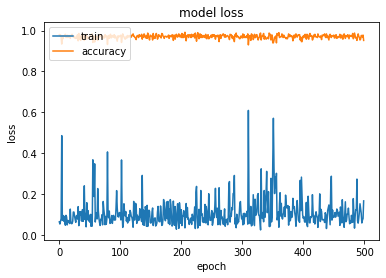

In [18]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['categorical_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'accuracy'], loc='upper left')
plt.show()

## 6. Result

In [19]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z,axis=1)
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[0, :], X[1, :], c=np.argmax(y,axis=0).ravel(), cmap=plt.cm.Spectral)
    #plt.savefig(fname = "vizu.png", format = 'png')

In [20]:
x = np.array([[-1.80128713e+00,  8.27326332e-01],[-1.80128713e+00,  8.27326332e-01]])
model.predict(x)

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [21]:
Y_hat = model.predict(X_train.T)
Y_predict = np.argmax(Y_hat, axis= 1)
print("Train accuracy: {} %".format(100 - np.mean(np.abs(Y_predict - Y)) * 100))

Train accuracy: 98.4 %


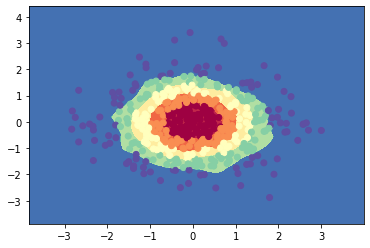

In [22]:
plot_decision_boundary(lambda x: model.predict(x), X_train,Y_train)

In [24]:
Y_hat = model.predict(X_train.T)
print(Y_hat)
np.argmax(Y_hat, axis= 1)

[[1.16333412e-03 9.93573725e-01 5.26285823e-03 2.50448750e-13
  3.13186241e-08]
 [7.99899083e-03 9.58336830e-01 3.36640030e-02 3.25854943e-09
  1.60882479e-07]
 [0.00000000e+00 0.00000000e+00 1.56444638e-28 6.31150901e-02
  9.36884940e-01]
 ...
 [3.41781996e-17 6.97874129e-05 9.85059977e-01 1.48695502e-02
  7.40820099e-07]
 [0.00000000e+00 0.00000000e+00 4.68777879e-23 4.12485093e-01
  5.87514937e-01]
 [0.00000000e+00 1.18832666e-23 1.00000000e+00 1.32291755e-28
  3.96058838e-22]]


array([1, 1, 4, 1, 3, 0, 1, 1, 3, 3, 4, 3, 4, 3, 2, 1, 4, 4, 0, 2, 4, 0,
       0, 1, 3, 4, 4, 1, 4, 0, 2, 4, 3, 0, 3, 1, 2, 2, 3, 4, 1, 1, 1, 2,
       2, 1, 0, 0, 3, 2, 3, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1, 4, 2, 2, 1,
       2, 1, 0, 0, 0, 2, 4, 3, 4, 3, 3, 1, 1, 3, 4, 3, 0, 1, 2, 3, 0, 0,
       1, 2, 3, 3, 2, 0, 4, 1, 4, 3, 3, 3, 0, 1, 4, 3, 1, 4, 1, 2, 2, 1,
       3, 0, 4, 1, 4, 4, 4, 1, 2, 3, 1, 2, 0, 3, 2, 2, 2, 4, 3, 3, 2, 1,
       3, 1, 0, 3, 3, 0, 4, 0, 0, 1, 1, 1, 0, 2, 0, 2, 0, 2, 3, 0, 0, 4,
       2, 1, 0, 0, 2, 0, 0, 0, 1, 1, 4, 0, 4, 1, 4, 4, 1, 4, 1, 4, 3, 1,
       0, 4, 3, 4, 1, 3, 0, 3, 0, 1, 1, 1, 3, 1, 3, 3, 3, 4, 0, 2, 2, 0,
       4, 2, 4, 3, 3, 3, 1, 2, 4, 0, 3, 0, 0, 2, 2, 4, 0, 1, 2, 4, 4, 2,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 4, 0, 2, 3, 2, 2, 3, 1, 2, 2,
       3, 4, 4, 2, 0, 0, 4, 2, 4, 4, 1, 3, 0, 4, 4, 1, 3, 1, 4, 2, 3, 0,
       2, 2, 3, 0, 2, 3, 0, 0, 4, 4, 1, 4, 3, 2, 0, 2, 2, 4, 4, 4, 0, 2,
       1, 2, 2, 1, 2, 4, 4, 0, 0, 4, 2, 1, 2, 4, 0,